In [1]:
import pandas as pd
import os 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from matplotlib  import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import joblib
import time
import random
from decile_analysis import *  # custom module for decile analysis 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import recall_score
from tabulate import tabulate
tab = lambda df : print(tabulate(df,headers = 'keys',tablefmt = 'psql'))


from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import NearestNeighbors 

from sklearn.cluster import DBSCAN 
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
df = pd.read_csv('data.csv')
df.columns = [i.lower() for i in df.columns]
pd.options.display.width=None

X_train shape : (1259, 23)
y_train shape : (1259,)
X_test shape : (315, 23)
y_test shape : (315,)


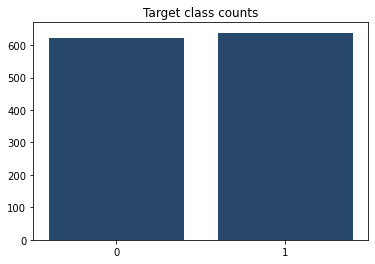

In [2]:
data = df
selected_features = ['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
target = 'default payment next month'
X = data[selected_features]
y = data['default payment next month']

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)
print('X_train shape :',X_train.shape)
print('y_train shape :',y_train.shape)
print('X_test shape :',X_test.shape)
print('y_test shape :',y_test.shape)


plt.title('Target class counts')
classes = y_train.value_counts().index
counts = y_train.value_counts()
plt.bar(x =classes,height = counts,color  = '#28496b')
plt.xticks(classes)
plt.show()

In [3]:
# Modelling 
models = [RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,
              LinearDiscriminantAnalysis,SVC,LogisticRegression]
random.seed(121)
def Model_training(models):
    random.seed(121)
    training_scores = {}
    testing_scores = {}
    testing_recall_scores = {}
    training_recall_scores = {}
    for model in models:
        m = model()
        m.fit(X_train,y_train)
        y_pred_test = m.predict(X_test)
        y_pred_train = m.predict(X_train)
        
        # average scores 
        training_score = m.score(X_train,y_train)
        testing_score = m.score(X_test,y_test)
        training_scores[model.__name__] = training_score
        testing_scores[model.__name__] = testing_score
        
        # recall measures 
        training_recall = recall_score(y_train,y_pred_train)
        testing_recall = recall_score(y_test,y_pred_test)
        
    
        training_recall_scores[model.__name__] = training_recall
        testing_recall_scores[model.__name__] = testing_recall
    
    measurements = pd.DataFrame()
    measurements.index = training_scores.keys()
    measurements['training_scores'] = training_scores.values()
    measurements['testing_scores'] = testing_scores.values()
    measurements['training_recalls'] = training_recall_scores.values()
    measurements['testing_recalls'] = testing_recall_scores.values()
    
    return measurements

In [4]:
random.seed(1)
evaluation_metrics = Model_training(models)
print('Evaluation with smote only')
tab(evaluation_metrics)


Evaluation with smote only
+----------------------------+-------------------+------------------+--------------------+-------------------+
|                            |   training_scores |   testing_scores |   training_recalls |   testing_recalls |
|----------------------------+-------------------+------------------+--------------------+-------------------|
| RandomForestClassifier     |          1        |         0.88254  |           1        |          0.892617 |
| GradientBoostingClassifier |          0.9166   |         0.828571 |           0.915361 |          0.832215 |
| AdaBoostClassifier         |          0.797458 |         0.774603 |           0.802508 |          0.778523 |
| LinearDiscriminantAnalysis |          0.725179 |         0.733333 |           0.730408 |          0.765101 |
| SVC                        |          0.589357 |         0.520635 |           0.695925 |          0.604027 |
| LogisticRegression         |          0.572677 |         0.6      |           0.573

In [5]:
# with less featurs 
# Removing some features 
random.seed(1)
selected_features = ['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6']
target = 'default payment next month'
X_train = X_train[selected_features]
X_test = X_test[selected_features]
evaluation_metrics = Model_training(models)
print('Evaluation with smote and less features')
tab(evaluation_metrics)

Evaluation with smote and less features
+----------------------------+-------------------+------------------+--------------------+-------------------+
|                            |   training_scores |   testing_scores |   training_recalls |   testing_recalls |
|----------------------------+-------------------+------------------+--------------------+-------------------|
| RandomForestClassifier     |          0.996823 |         0.828571 |           0.998433 |          0.838926 |
| GradientBoostingClassifier |          0.842732 |         0.796825 |           0.819749 |          0.791946 |
| AdaBoostClassifier         |          0.756156 |         0.739683 |           0.768025 |          0.758389 |
| LinearDiscriminantAnalysis |          0.721207 |         0.714286 |           0.724138 |          0.751678 |
| SVC                        |          0.543288 |         0.488889 |           0.532915 |          0.47651  |
| LogisticRegression         |          0.493249 |         0.526984 |   